In [45]:
## imports
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

In [3]:
## short example of marginalization. this uses intervals but needs to be changed to boxes.

## basic 2d box plotting function

def plot2DBox(box, color="b",alpha=0.2):
    x_limits = [box[0][0],box[0][1]]
    y_limits = [box[1][0],box[1][1]]
    x = np.linspace(x_limits[0], x_limits[1], 1000)
    plt.fill_between(x, y_limits[0], y_limits[1], color=color, alpha=alpha)


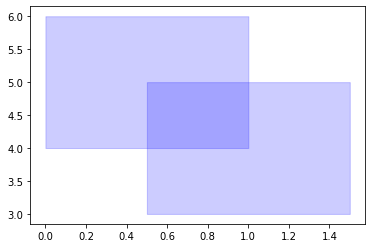

In [64]:
box_1 = [[0.5,2], [0,1]]
box_2 = [[0,1], [4,6]]
box_3 = [[0.5,1.5], [3,5]]
plot2DBox(box_2)
plot2DBox(box_3)
##plot2DBox(box_3)

In [74]:
def union_two_intervals(i1,i2):
    #intersection = intersect_two_intervals(i1,i2)
    if lt(i1[0], i2[0]):
        minInterval = i1
        maxInterval = i2
    else:
        minInterval = i2
        maxInterval = i1
    if gte(minInterval[1],maxInterval[0]): ## intervals touch at one point. 
        ans = [[minInterval[0], maxInterval[1]]] 
        return ans
    elif lt(minInterval[1], maxInterval[0]): ## intervals are disjoint.
        ans = [minInterval, maxInterval]
        return ans
            

In [77]:
### interval example 1: disjoint
interval1 = [2,4]
interval2 = [5,6]
print(union_two_intervals(interval1,interval2))

### interval example 2: contact at one point
interval1 = [3,4]
interval2 = [1,3]
print(union_two_intervals(interval1,interval2))

### interval example 3: more than 1 point overlap
interval1 = [1,3]
interval2 = [2,4]
print(union_two_intervals(interval1,interval2))

[[2, 4], [5, 6]]
[[1, 4]]
[[1, 4]]


In [65]:
def union_two_boxes(b1,b2):
    ## check for intersecting x-bounds
    ## if there is an intersection:
    x_intersection = (intersect_two_intervals(b1[0], b2[0]))
    if x_intersection != []:
        total_width = x_intersection[1] - x_intersection[0]
        bounds = x_intersection
        print(bounds)
    y_intersection = (intersect_two_intervals(b1[1], b2[1]))
    ## no y intersection
    if y_intersection == []: 
        height_b1 = b1[1][1] - b1[1][0]
        height_b2 = b2[1][1] - b2[1][0]
        total_height = (height_b1 + height_b2)
    ## nontrivial y intersection: calculate
    else:
        total_height = y_intersection[1] - y_intersection[0]
    return total_width, total_height    

[0.5, 1]


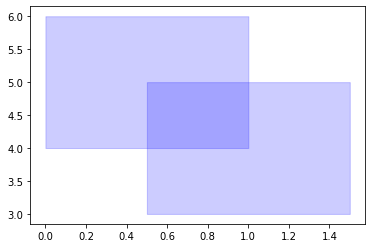

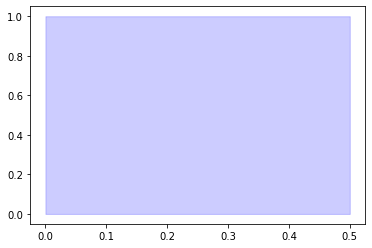

In [66]:
a = union_two_boxes(box_2, box_3)
plot2DBox(box_2)
plot2DBox(box_3)
plt.show()
plot2DBox([[0,0+a[0]],[0,0+a[1]]]) ## change x coordinate to be x bounds